In [1]:
import sys, os
sys.path.append(os.path.abspath('../src'))

from data_processor import DataProcessor

############ 1 Data Processing ############

# Define file path 
file_path = '../data/raw/data_factory_1.xlsx'  
dp = DataProcessor(file_path)
dp.change_pivot('timestamp', 'param_name', 'value')
dp.rename_column_to_timestamp('timestamp')
dp.rename_column_to_permeatepressure('Permeate Pressure')
# dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])

In [2]:
dp.df.head()

param_name,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,PermeatePressure,PermeateConductivity,PermeateFlow,Recovery
0,2022-11-01 00:00:00,119.058464,254.427083,59.811424,238.884183,387.863646,273.325000,83.620000,33.441771,2.684261,269.623333,69.427135
1,2022-11-01 01:00:00,119.284861,254.408333,59.793070,239.050850,388.577708,273.159583,83.740000,33.405078,2.690898,270.177500,69.401548
2,2022-11-01 02:00:00,118.848508,254.044583,59.789896,239.117517,386.958541,272.952917,83.768333,33.316614,2.695333,269.188750,69.404638
3,2022-11-01 03:00:00,118.631324,253.052917,59.742965,239.234183,388.434167,271.841667,84.445000,33.036159,2.644088,270.778750,69.566374
4,2022-11-01 04:00:00,118.826094,254.352500,59.799096,239.217517,387.695000,273.296667,84.073333,33.177526,2.674923,269.938333,69.423221


In [3]:
dp.export_to_csv('../data/processed/parameters.csv')

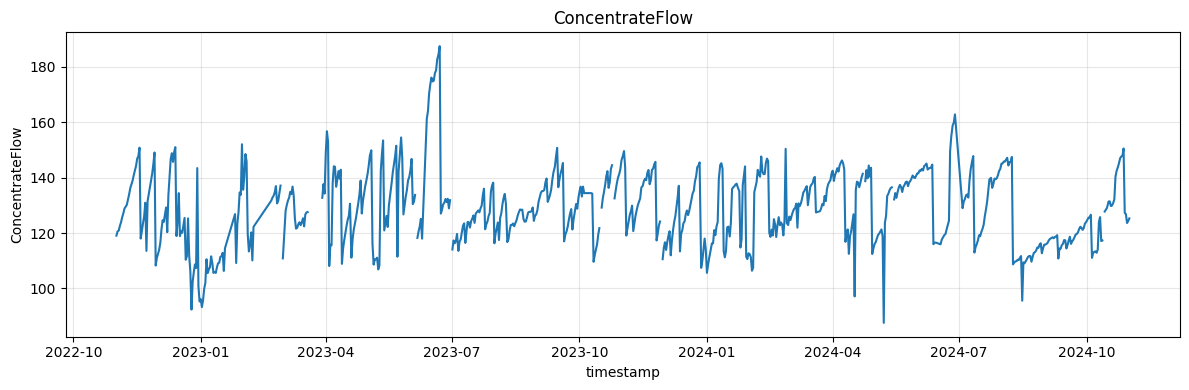

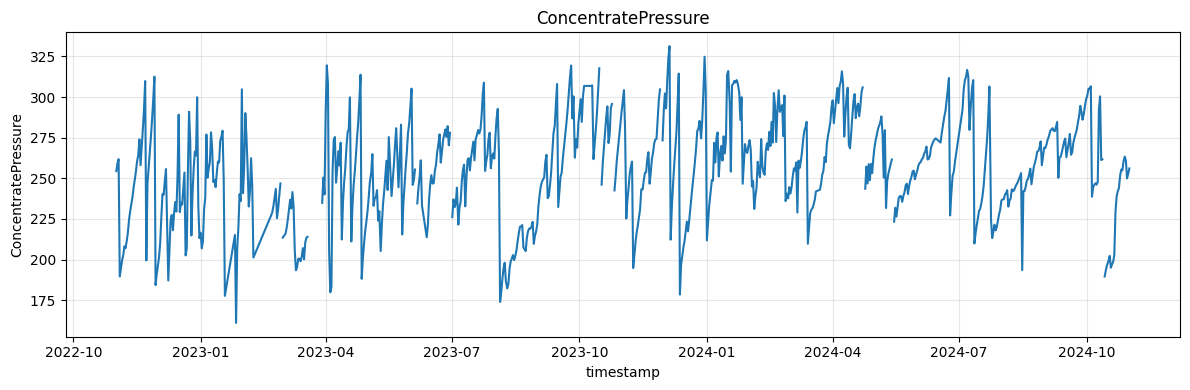

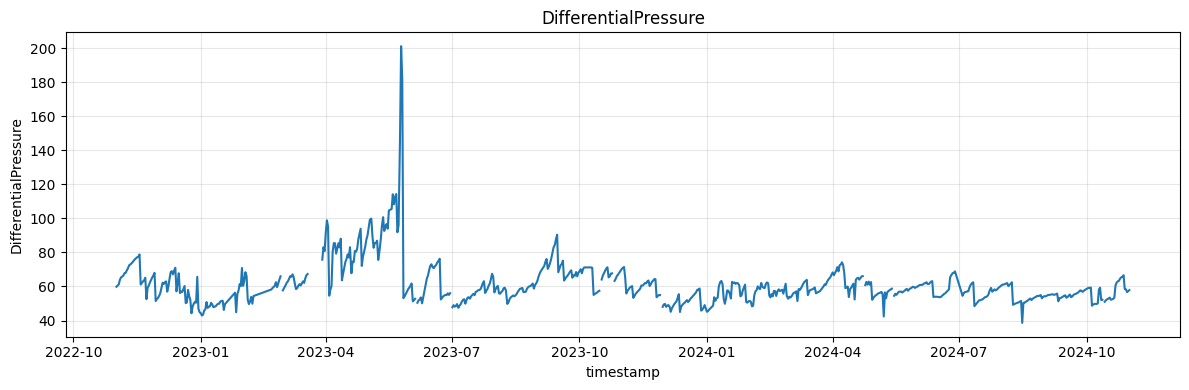

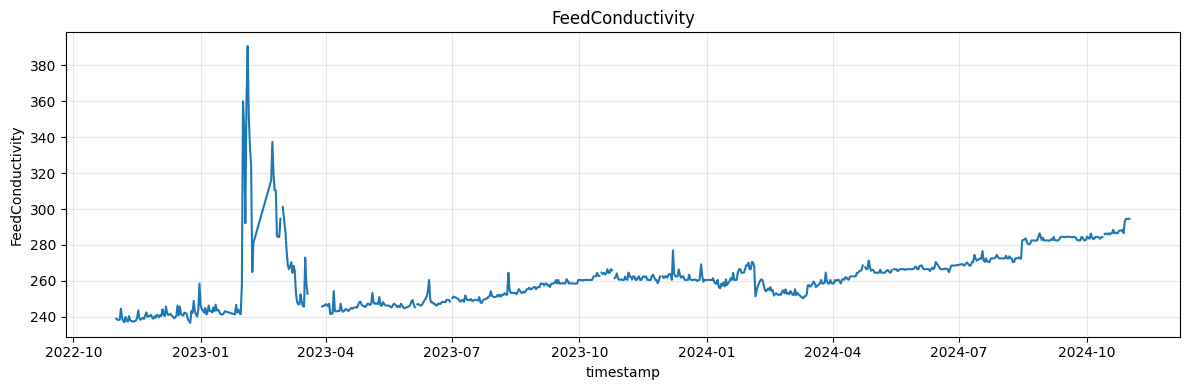

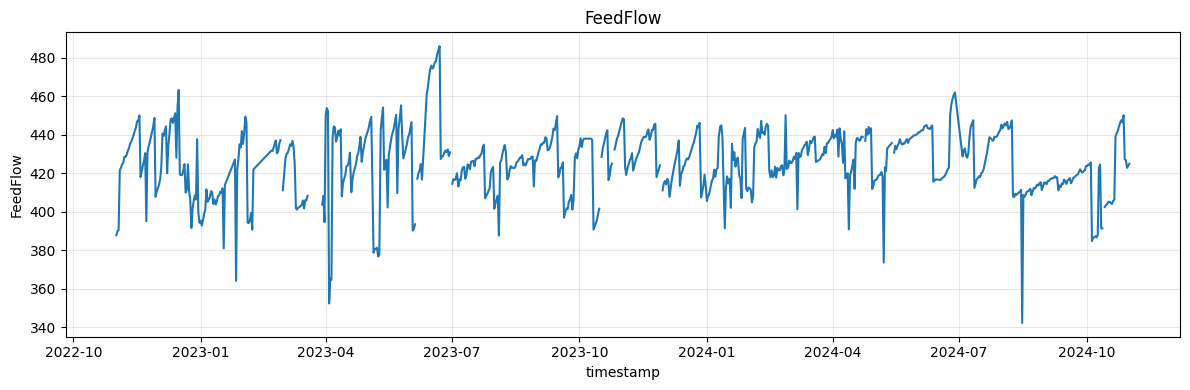

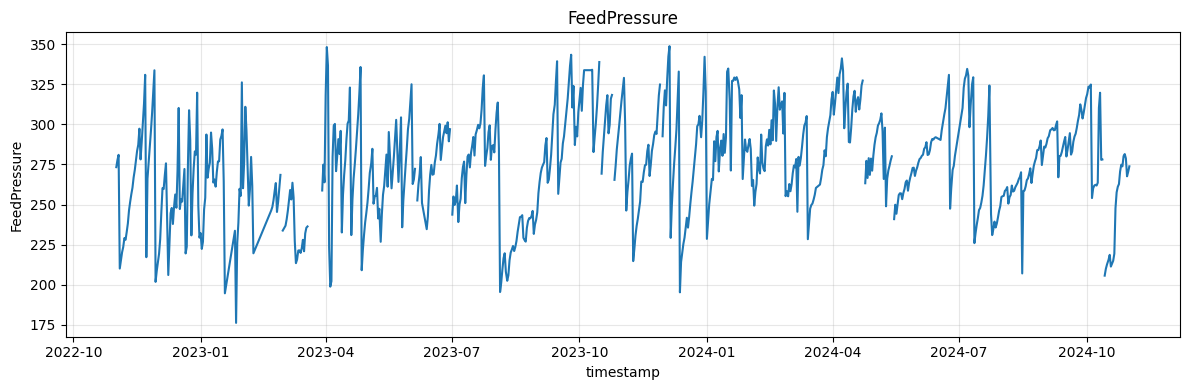

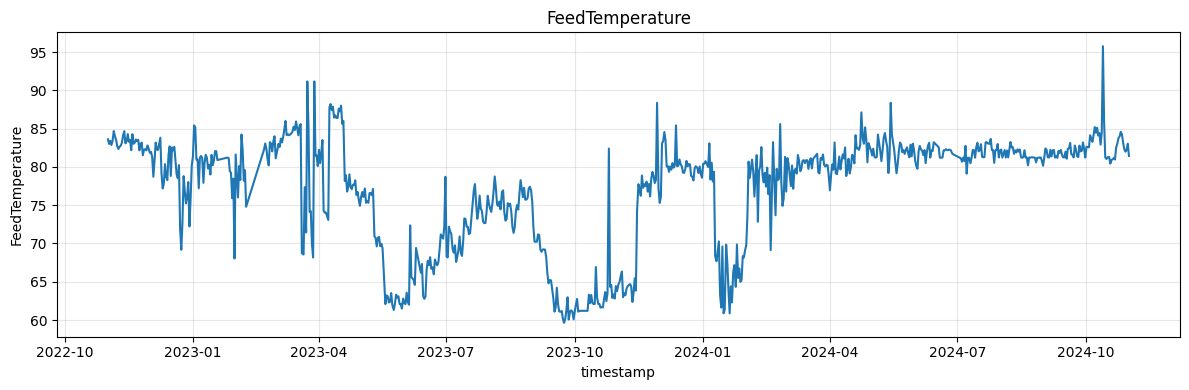

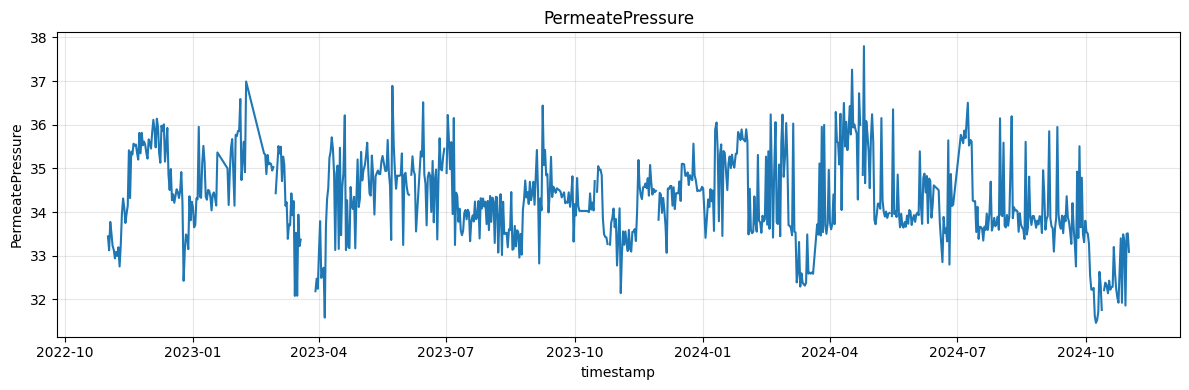

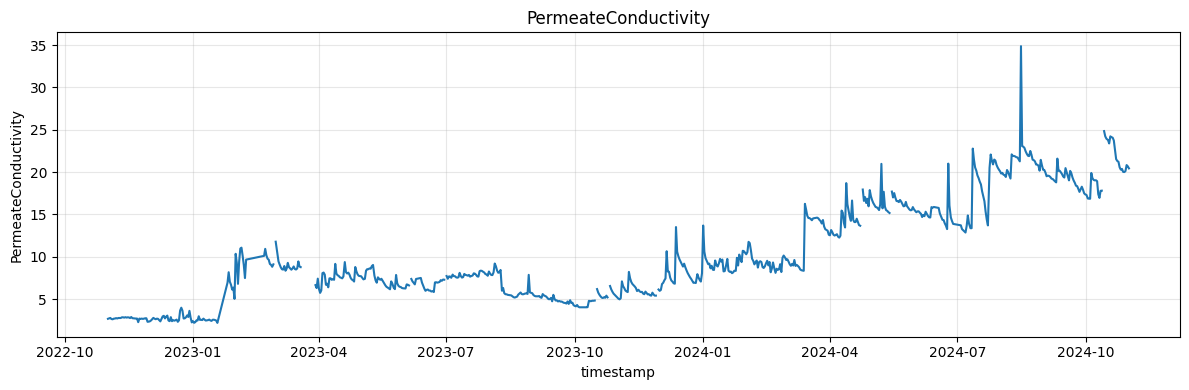

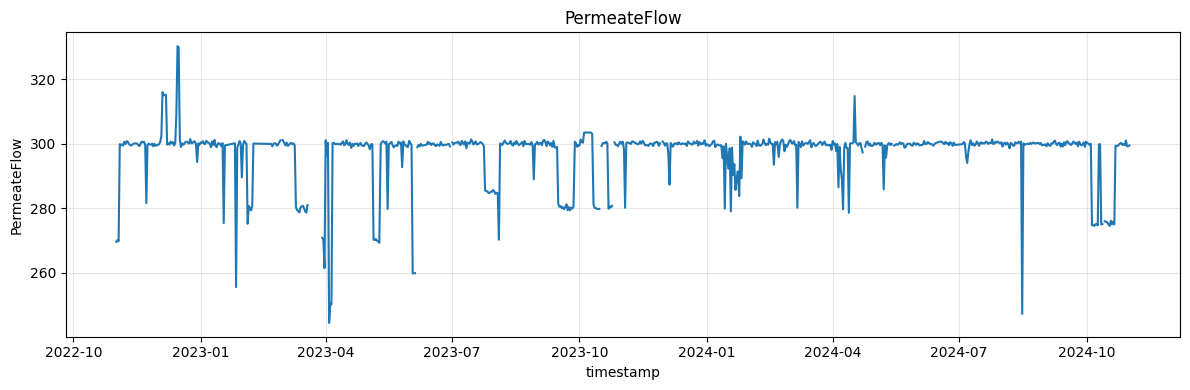

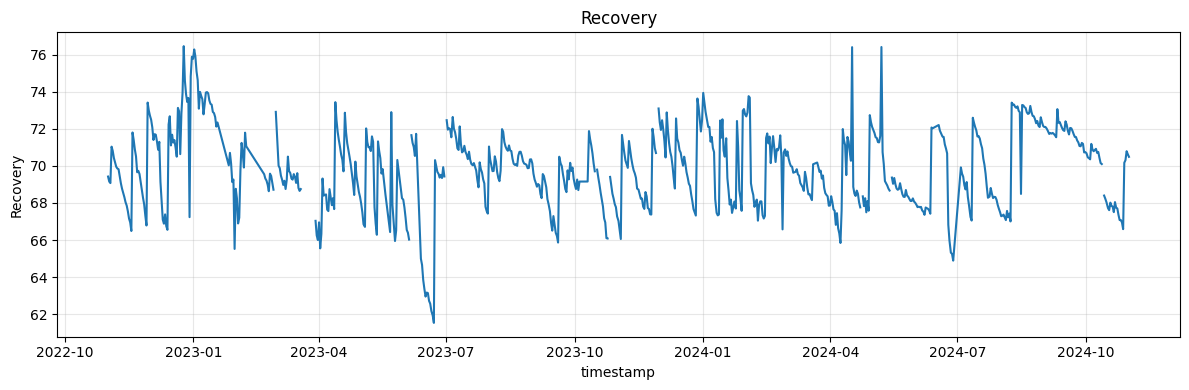

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

k = 20               # take one point every 50 rows
df_plot = dp.df.iloc[::k].copy()


# visualize inputs over timestamp
# make sure timestamp is datetime
if 'timestamp' in df_plot.columns:
    df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])

    for col in df_plot.columns:
        if col in ['timestamp']:  # skip timestamp as a y-value
            continue
        
        plt.figure(figsize=(12, 4))
        plt.plot(df_plot['timestamp'], df_plot[col])
        plt.title(col)
        plt.xlabel('timestamp')
        plt.ylabel(col)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()


In [5]:
# from data_processor import CycleProcessor

# cp = CycleProcessor(column_name='FeedFlow', df=dp.df, threshold=10)
# cp.identify_cycles()
# cp.assign_cycle_features()

In [6]:
# from utils.plot.plot_by_cycle import interactive_cycle_plot,plot_by_cycle
# interactive_cycle_plot(cp.df, plot_by_cycle)

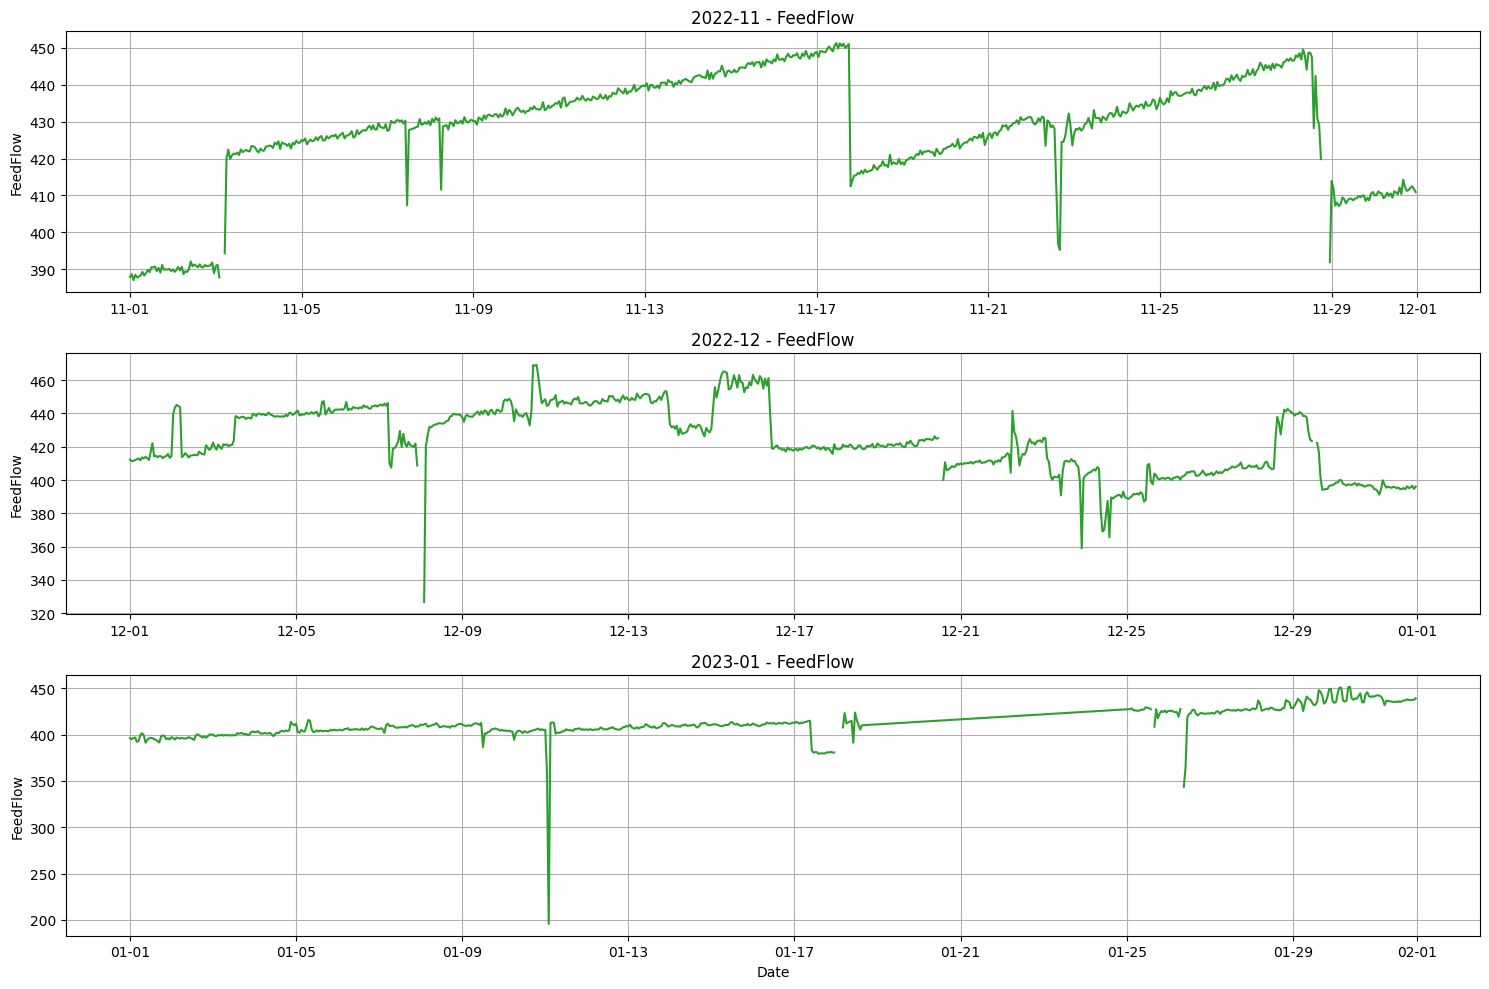

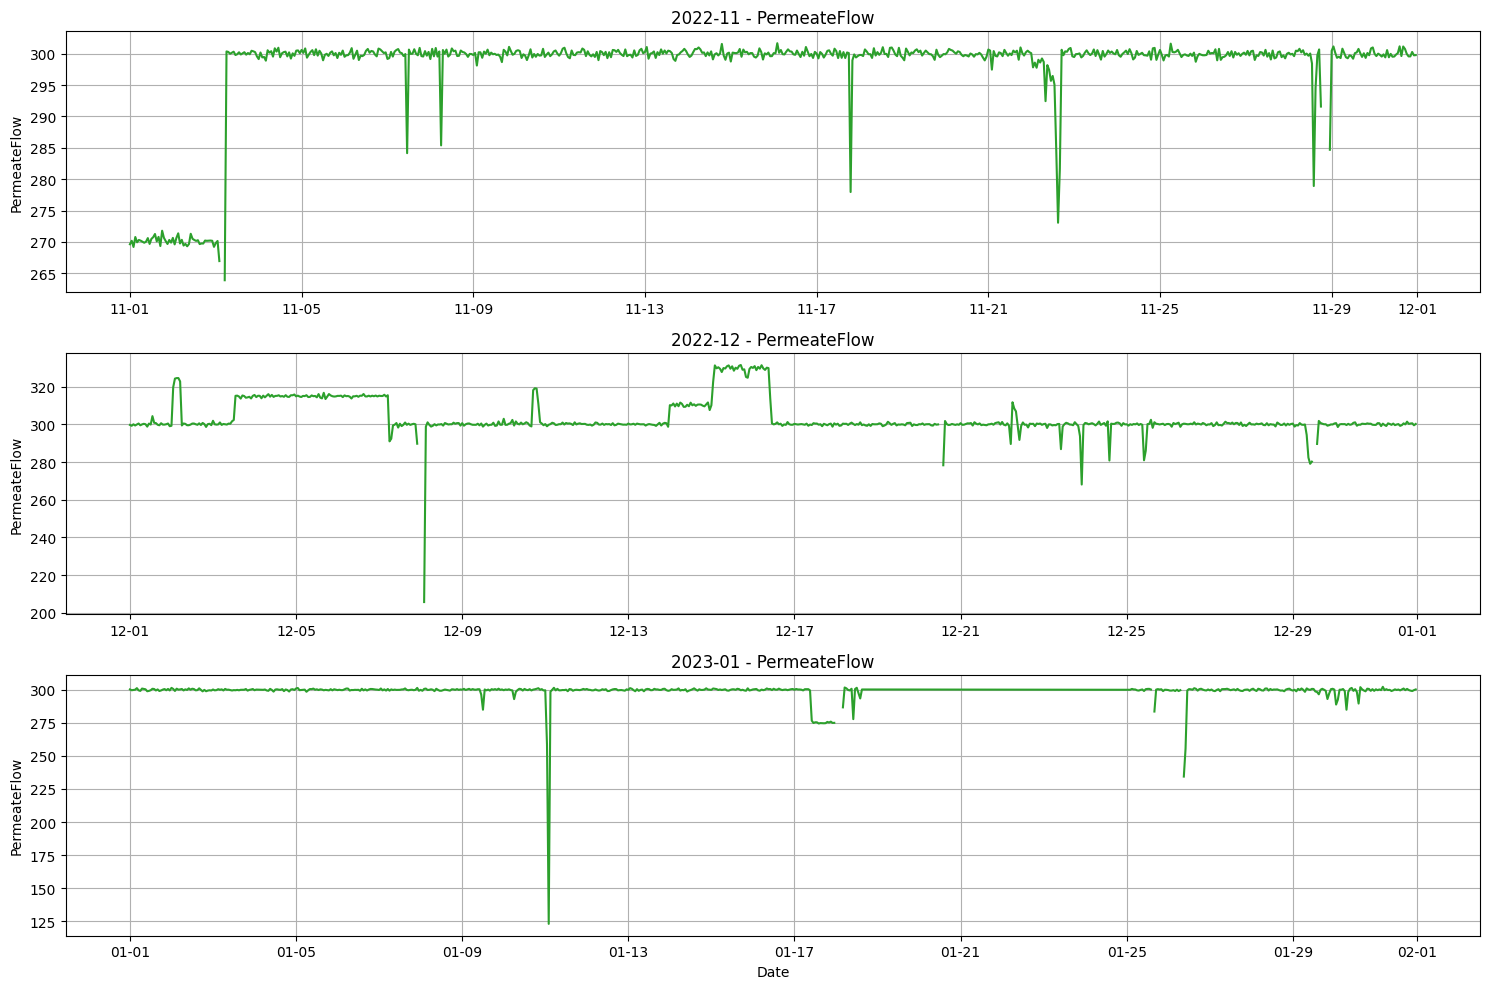

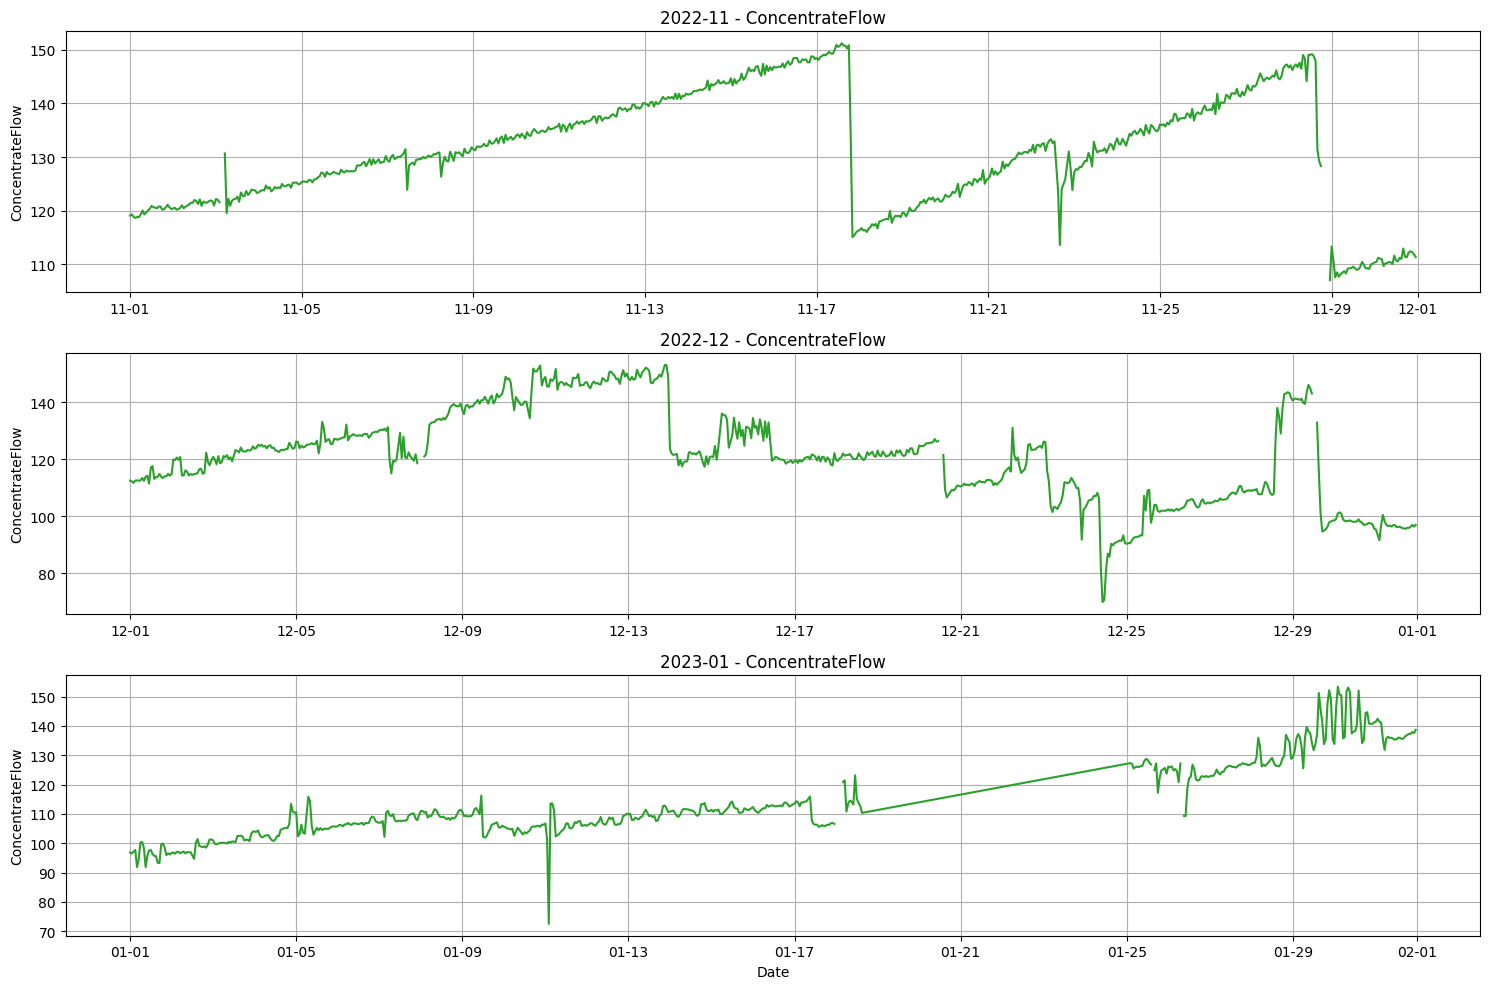

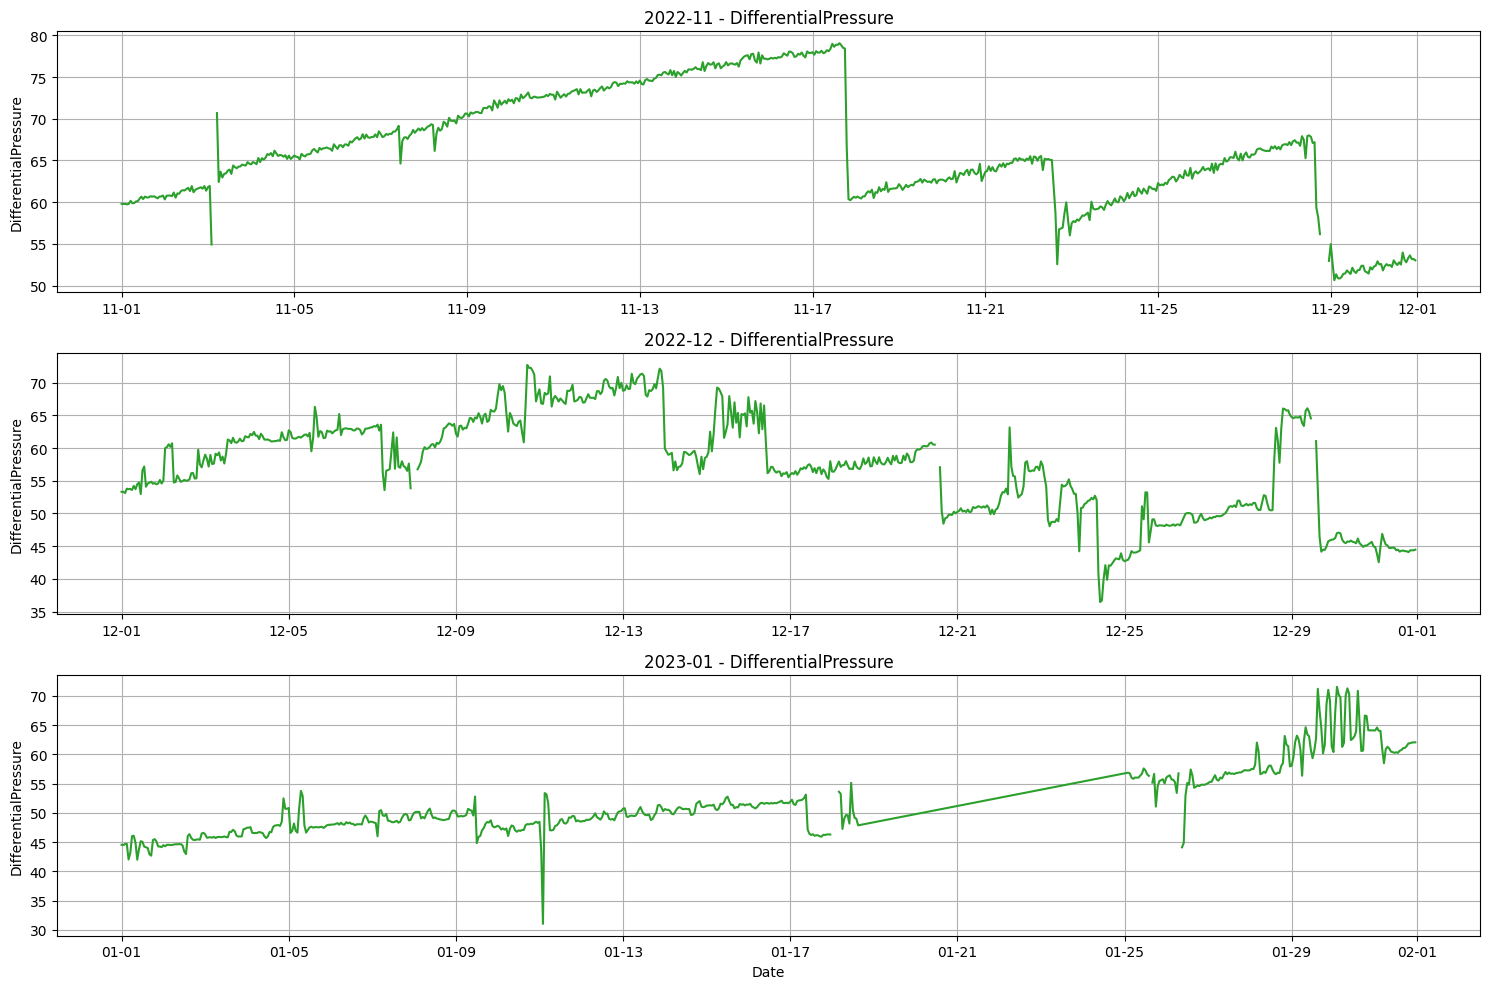

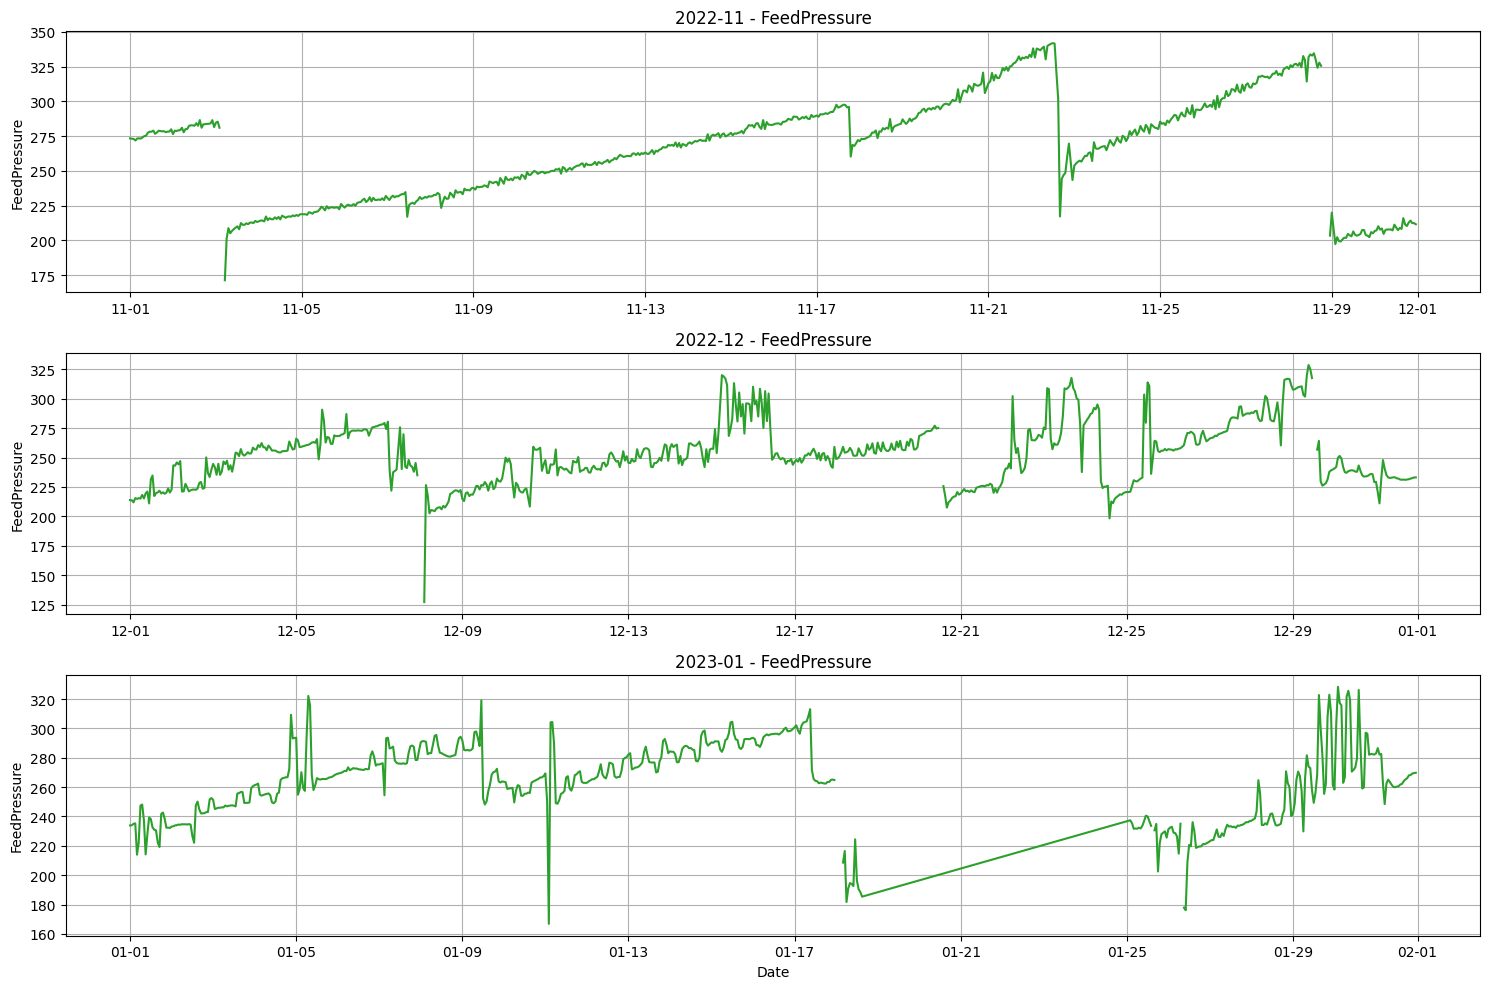

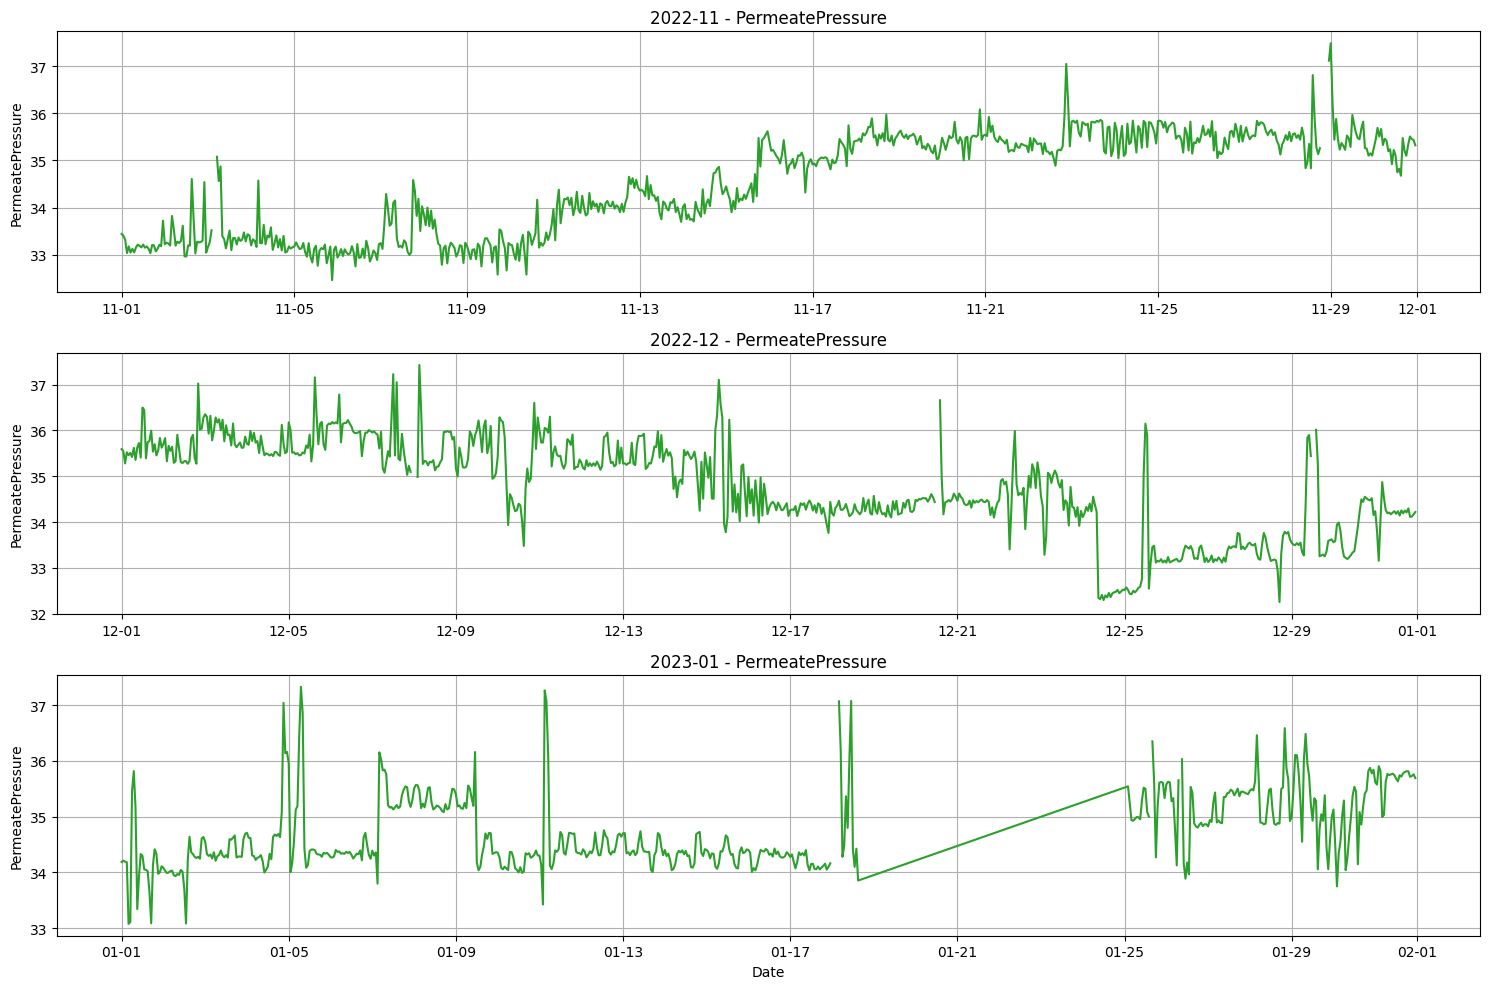

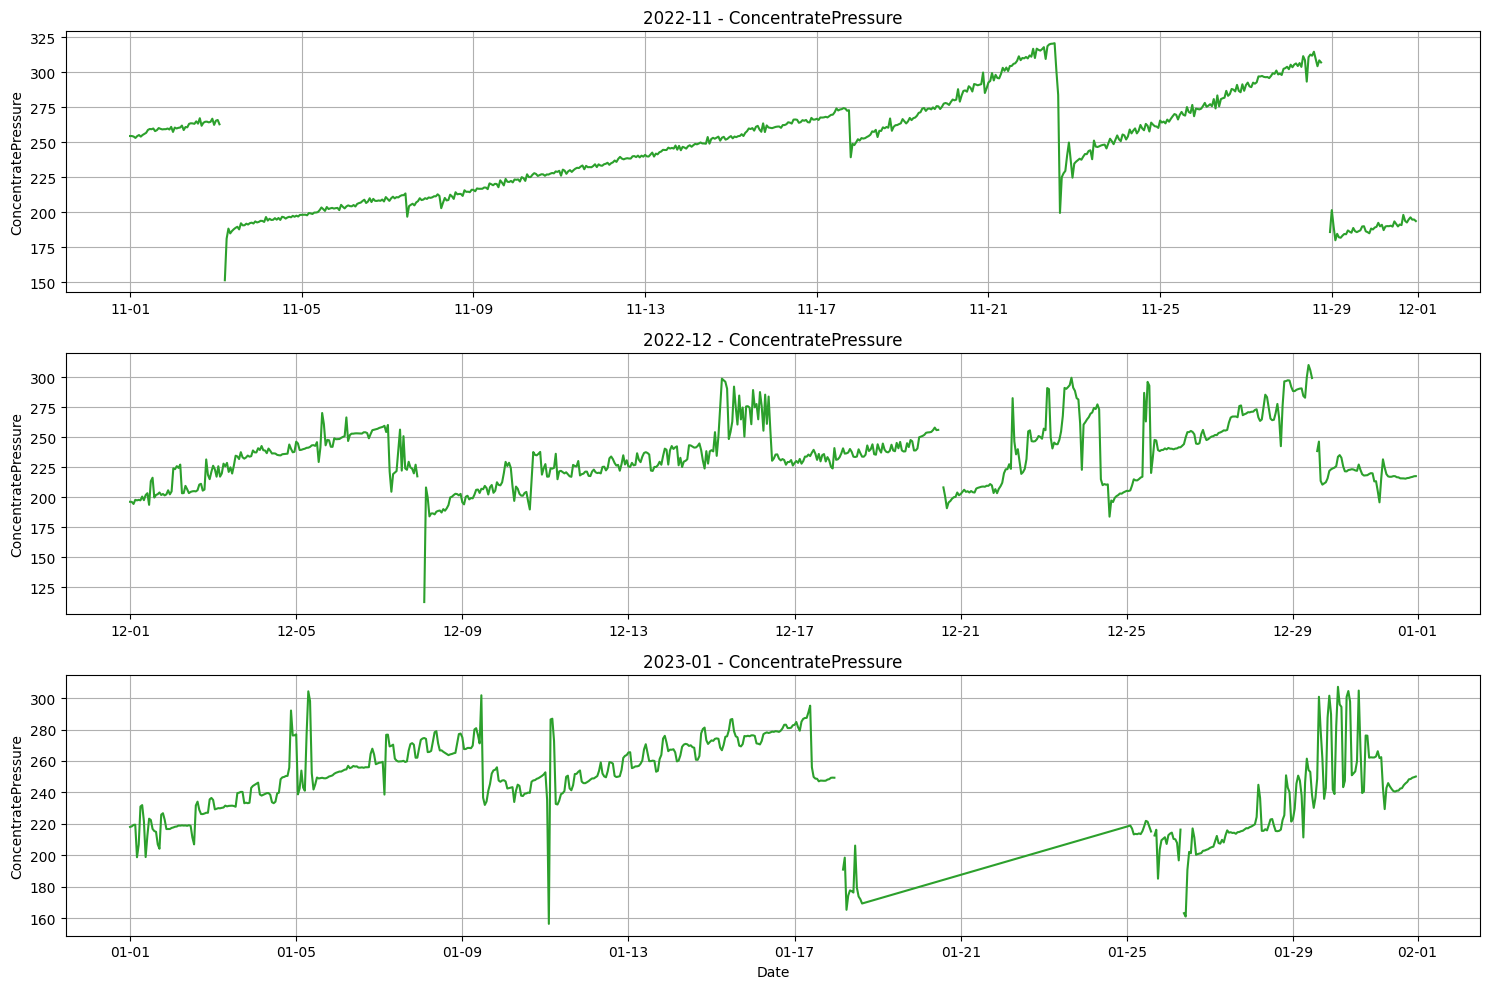

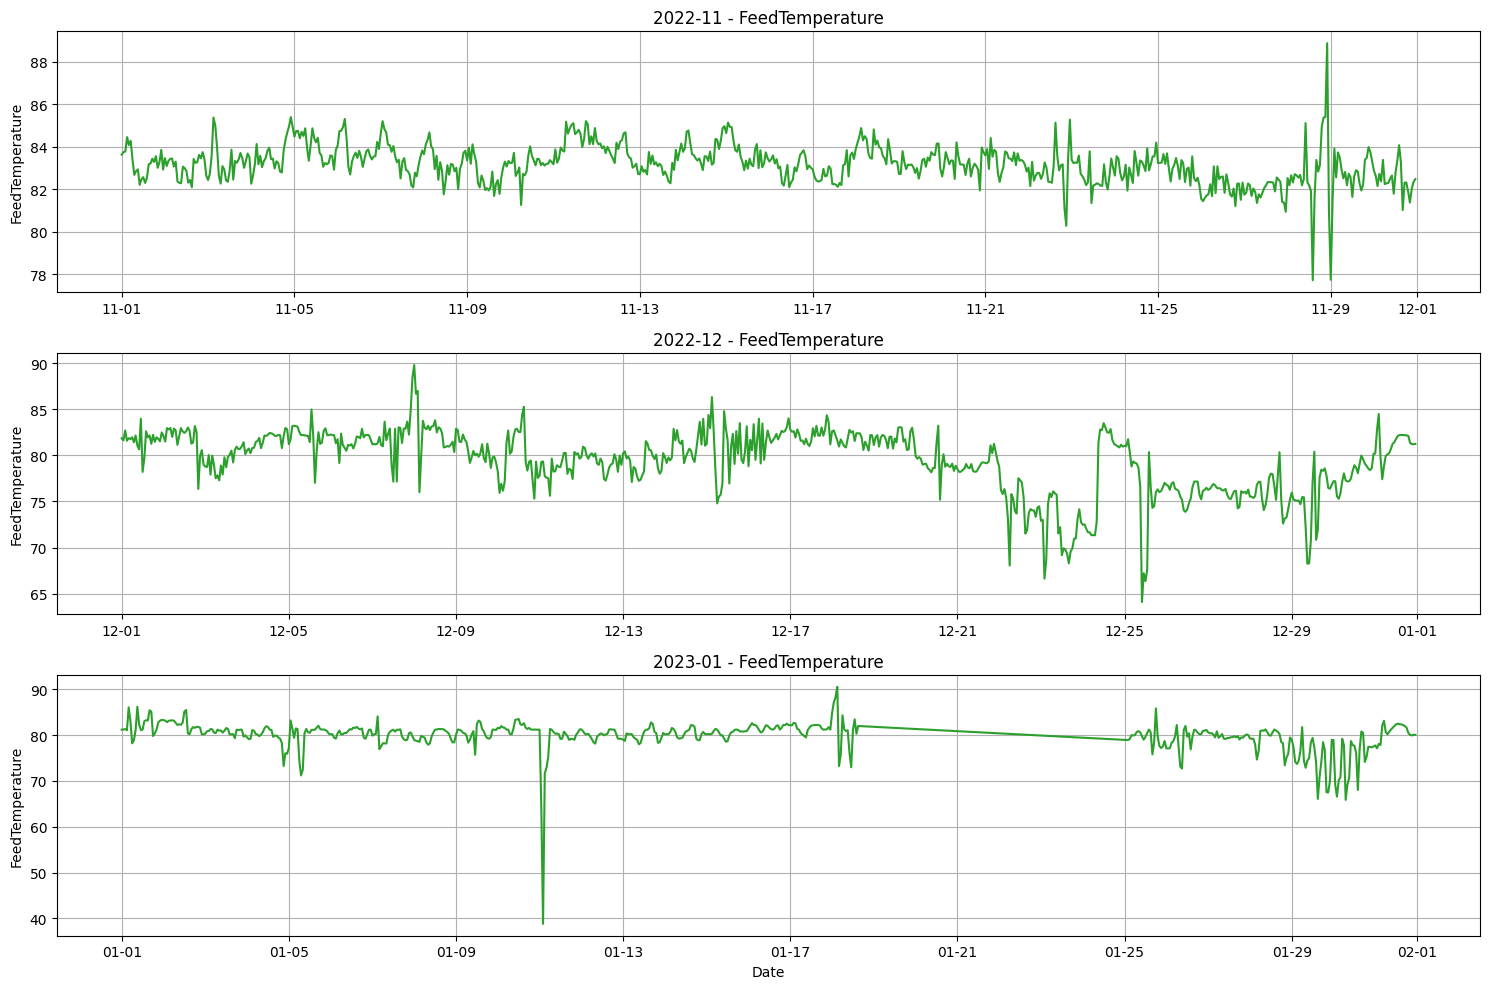

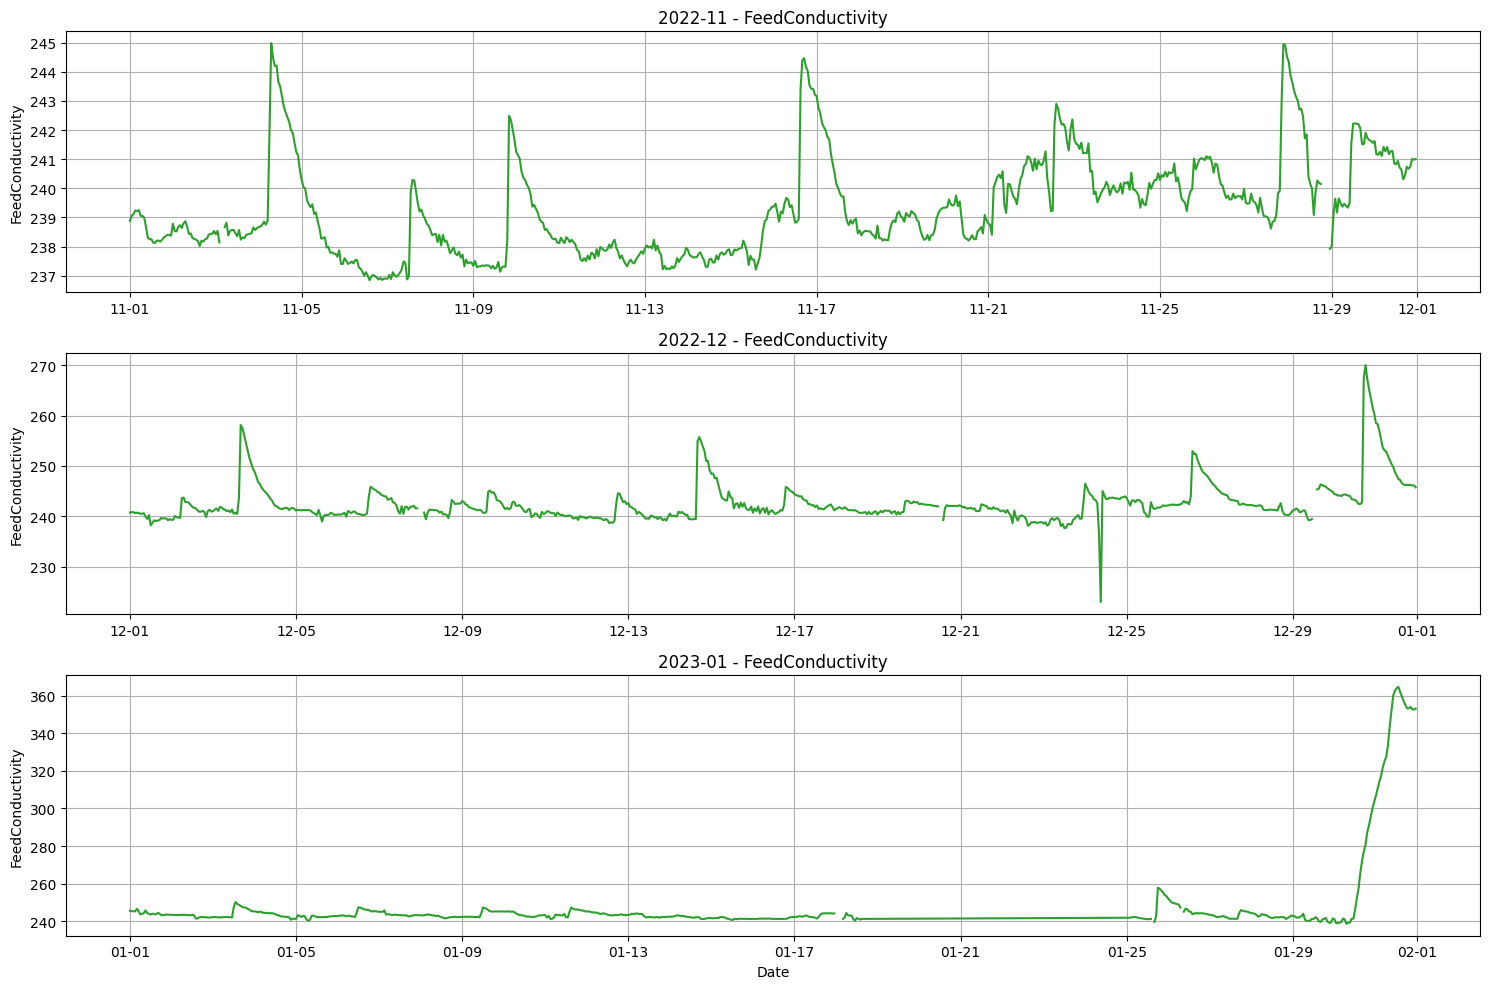

KeyError: 'ConcentrateConductivity'

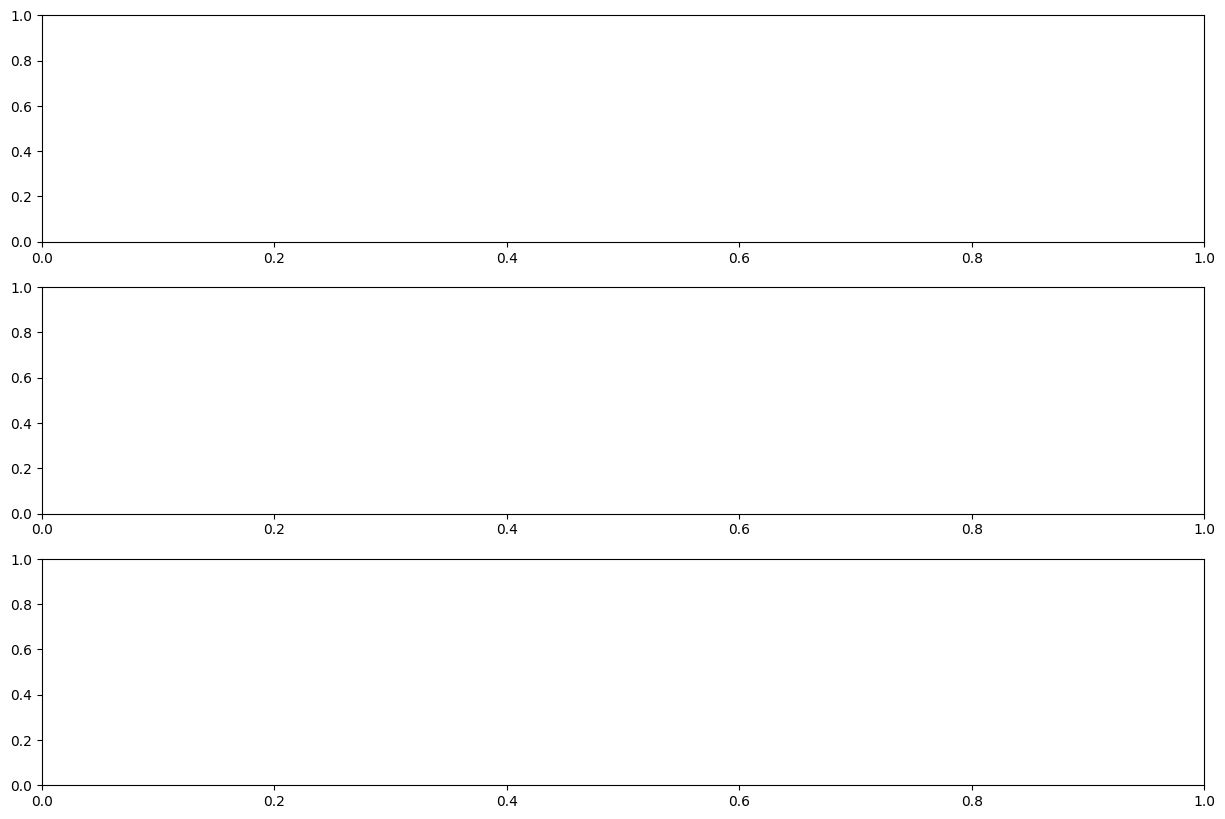

In [8]:
from utils.plot.plot_by_time_period import PlotByTimePeriod

pbt = PlotByTimePeriod(dp.df)
month = ['2022-11', '2022-12','2023-01']
pbt.plot_by_month(month,'FeedFlow')
pbt.plot_by_month(month,'PermeateFlow')
pbt.plot_by_month(month,'ConcentrateFlow')
pbt.plot_by_month(month,'DifferentialPressure')
pbt.plot_by_month(month,'FeedPressure')
pbt.plot_by_month(month,'PermeatePressure')
pbt.plot_by_month(month,'ConcentratePressure')
pbt.plot_by_month(month,'FeedTemperature')
pbt.plot_by_month(month,'FeedConductivity')
pbt.plot_by_month(month,'ConcentrateConductivity')
pbt.plot_by_month(month,'PermeateConductivity')
pbt.plot_by_month(month,'Recovery')




In [ ]:
import sys, os
sys.path.append(os.path.abspath('../src'))

from data_processor import DataProcessor

############ 1 Data Processing ############

# Define file path 
file_path = '../data/raw/data_factory_1.xlsx'  
dp = DataProcessor(file_path)
dp.change_pivot('timestamp', 'param_name', 'value')
dp.rename_column_to_timestamp('timestamp')
dp.rename_column_to_permeatepressure('Permeate Pressure')
dp.list_columns()


['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [ ]:
from data_processor import CycleProcessor

cp = CycleProcessor(signal_col='FeedFlow', df=dp.df, threshold=10)
cp.identify_cycles()
cp.assign_cycle_features()
cp.df.to_csv('../data/processed/cycle_1.csv')

<Figure size 1000x400 with 0 Axes>

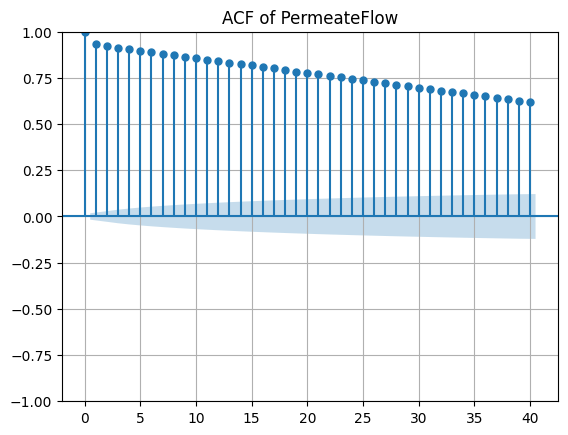

<Figure size 1000x400 with 0 Axes>

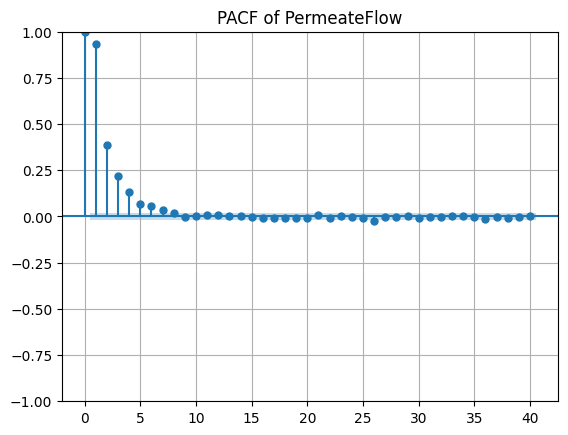

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
df = pd.read_csv("../data/processed/cycle_1.csv")

# Choose ONE numeric variable (important!)
target_col = "PermeateFlow"   # e.g. flow, pressure, conductivity
series = df[target_col].dropna()

# ACF
plt.figure(figsize=(10, 4))
plot_acf(series, lags=40)
plt.title(f"ACF of {target_col}")
plt.grid(True)
plt.show()

# PACF
plt.figure(figsize=(10, 4))
plot_pacf(series, lags=40, method="ywm")
plt.title(f"PACF of {target_col}")
plt.grid(True)
plt.show()


<Figure size 1000x400 with 0 Axes>

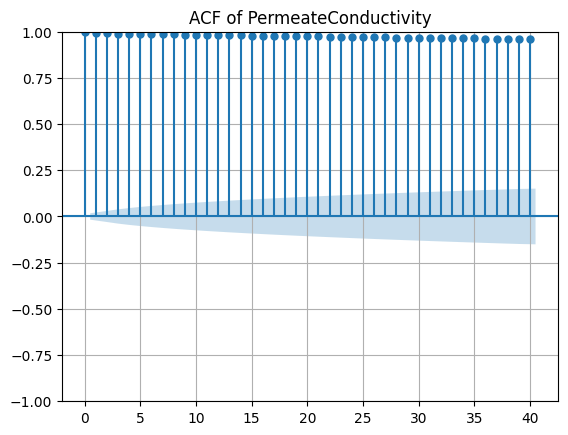

<Figure size 1000x400 with 0 Axes>

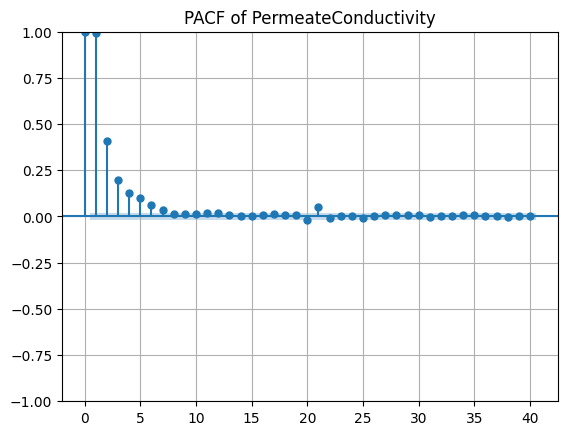

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
df = pd.read_csv("../data/processed/cycle_1.csv")

# Choose ONE numeric variable (important!)
target_col = "PermeateConductivity"   # e.g. flow, pressure, conductivity
series = df[target_col].dropna()

# ACF
plt.figure(figsize=(10, 4))
plot_acf(series, lags=40)
plt.title(f"ACF of {target_col}")
plt.grid(True)
plt.show()

# PACF
plt.figure(figsize=(10, 4))
plot_pacf(series, lags=40, method="ywm")
plt.title(f"PACF of {target_col}")
plt.grid(True)
plt.show()
